In [15]:
using CSV
using DataFrames
using Plots
using Statistics

In [16]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [17]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [18]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [19]:
naive_multiplication(Asmall,Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [20]:
naive = Array{Float64}(undef, 100)
better = Array{Float64}(undef, 100)
blas = Array{Float64}(undef, 100)
sizes = Array{Int64}(undef, 100)
for i=1:10
    A=rand(100*i,100*i);
    B=rand(100*i,100*i);
    for k=1:10
        sizes[10*(i-1)+k] = 100*i
        naive[10*(i-1)+k] = @elapsed naive_multiplication(A,B)
        better[10*(i-1)+k] = @elapsed better_multiplication(A,B)
        blas[10*(i-1)+k] = @elapsed A*B
    end
end

In [21]:
using DataFrames
df=DataFrame()
df[:size] = sizes
df[:naive] = naive
df[:better] = better
df[:blas] = blas
DataFrames.tail(df)

,size,naive,better,blas
,Int64,Float64,Float64,Float64
1,1000,3.82128,1.6287,0.0135671
2,1000,3.82711,1.62591,0.0178235
3,1000,3.82016,1.6538,0.0134846
4,1000,3.91143,1.65864,0.0134799
5,1000,3.87869,1.6518,0.0132947
6,1000,3.86336,1.67868,0.0251009


In [22]:
df2=by(df, [:size]) do subGroup
          DataFrame(meanNaive = mean(subGroup[:naive]), stdNaive = std(subGroup[:naive]),
            meanBetter = mean(subGroup[:better]), stdBetter = std(subGroup[:better]),
            meanBlas = mean(subGroup[:blas]), stdBlas = std(subGroup[:blas])) 
        end

,size,meanNaive,stdNaive,meanBetter,stdBetter,meanBlas,stdBlas
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,100,0.00357082,9.66882e-5,0.00175263,5.5083e-5,0.000719765,0.00197056
2,200,0.0909457,0.0220664,0.0476081,0.0360021,0.00131876,0.00320614
3,300,0.202798,0.0324222,0.0446746,0.000710428,0.0016766,0.00213877
4,400,0.342209,0.0285837,0.104876,0.00154321,0.00130992,0.000305072
5,500,0.584325,0.0214087,0.205852,0.00282559,0.00224664,0.000108574
6,600,0.932871,0.0260315,0.353717,0.0055983,0.00376919,0.000943701
7,700,1.51867,0.270067,0.573636,0.0346662,0.00510992,0.000369287
8,800,2.02503,0.0233085,0.836441,0.00853517,0.0229994,0.0486025
9,900,2.85227,0.03098,1.19016,0.0100729,0.0102078,0.00138002


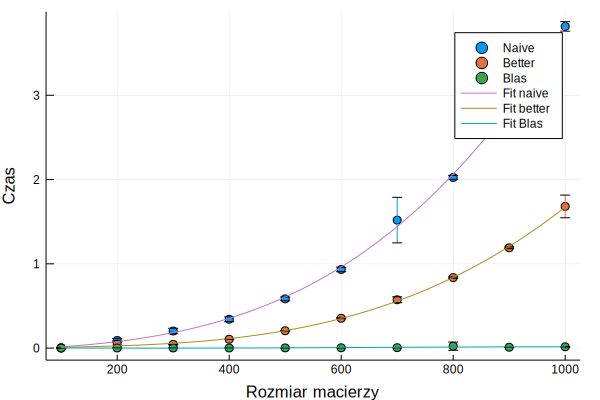

In [23]:
using Polynomials
xs = 1:10; 
ys = map(x->x*100, xs)
fitNaive=polyfit(ys, df2[:meanNaive],3)
fitBetter=polyfit(ys, df2[:meanBetter],3)
fitBlas=polyfit(ys, df2[:meanBlas],3)
scatter(df2[:size], df2[:meanNaive], yerr = df2[:stdNaive], label="Naive", xlabel="Rozmiar macierzy", ylabel="Czas")
scatter!(df2[:size], df2[:meanBetter], yerr = df2[:stdBetter], label = "Better")
scatter!(df2[:size], df2[:meanBlas], yerr = df2[:stdBlas], label = "Blas")
xd=100:10:1000
plot!(xd,polyval(fitNaive, xd), label="Fit naive")
plot!(xd,polyval(fitBetter, xd), label="Fit better")
plot!(xd,polyval(fitBlas, xd), label="Fit Blas")


In [24]:
input="dane.csv"
df_c=CSV.read(input, delim=";")

,size,naive,better,blas
,Int64⍰,Float64⍰,Float64⍰,Float64⍰
1,100,0.02721,0.027143,0.002654
2,100,0.027217,0.027106,0.002692
3,100,0.027248,0.027127,0.002643
4,200,0.222343,0.216423,0.024788
5,200,0.223311,0.216874,0.024424
6,200,0.222122,0.2167,0.024423
7,300,0.803839,0.734028,0.081421
8,300,0.76406,0.732183,0.0805
9,300,0.752339,0.730896,0.086514


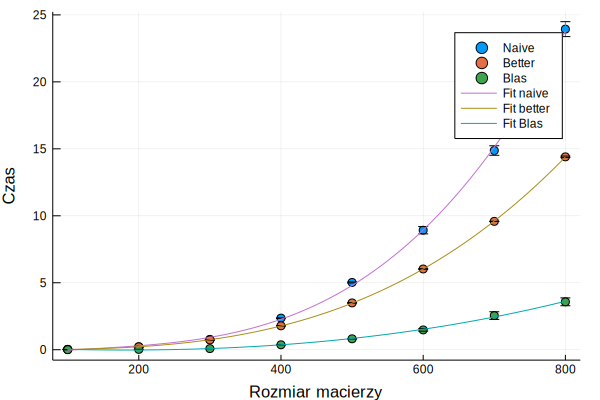

In [25]:
df3=by(df_c, [:size]) do subGroup
          DataFrame(meanNaive = mean(subGroup[:naive]), stdNaive = std(subGroup[:naive]),
            meanBetter = mean(subGroup[:better]), stdBetter = std(subGroup[:better]),
            meanBlas = mean(subGroup[:blas]), stdBlas = std(subGroup[:blas])) 
        end
scatter(df3[:size], df3[:meanNaive], yerr = df3[:stdNaive], label="Naive", xlabel="Rozmiar macierzy", ylabel="Czas")
scatter!(df3[:size], df3[:meanBetter], yerr = df3[:stdBetter], label = "Better")
scatter!(df3[:size], df3[:meanBlas], yerr = df3[:stdBlas], label = "Blas")
xs = 1:8; 
ys = map(x->x*100, xs)
fitNaive=polyfit(ys, df3[:meanNaive],3)
fitBetter=polyfit(ys, df3[:meanBetter],3)
fitBlas=polyfit(ys, df3[:meanBlas],3)
xd=100:10:800
plot!(xd,polyval(fitNaive, xd), label="Fit naive")
plot!(xd,polyval(fitBetter, xd), label="Fit better")
plot!(xd,polyval(fitBlas, xd), label="Fit Blas")

In [26]:
fitNaive

Poly(-0.5281812857142923 + 0.007099599338624374*x - 2.959810833333338e-5*x^2 + 7.344460185185185e-8*x^3)

In [27]:
fitBetter

Poly(-0.03105152380952183 + 0.0003605190343915138*x - 1.3190333333332735e-6*x^2 + 2.9250564814814767e-8*x^3)

In [28]:
fitBlas

Poly(0.20656554761904755 - 0.0024093886507936487*x + 5.725903968253962e-6*x^2 + 3.2680555555555595e-9*x^3)